In [7]:
#import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

#load data
df = pd.read_csv('/Users/saumyaariyawansha/Documents/Data Science/python_exercises/data_jobs.csv')

#data cleaning
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [8]:
df_US = df[df['job_country'] == 'United States'].copy()

In [9]:
df_skills = df_US.explode('job_skills')

In [10]:
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,NaN
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,NaN
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [20]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

In [21]:
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [22]:
type(df_skills_count)

pandas.core.series.Series

In [23]:
df_skills_count = df_skills_count.reset_index(name='skill_count')

In [24]:
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [25]:
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [26]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1850,xamarin,Data Engineer,1
1807,webex,Senior Data Scientist,1
1808,webex,Software Engineer,1
1116,planner,Cloud Engineer,1


In [27]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer',
 'Business Analyst',
 'Software Engineer',
 'Machine Learning Engineer',
 'Cloud Engineer']

In [31]:
job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

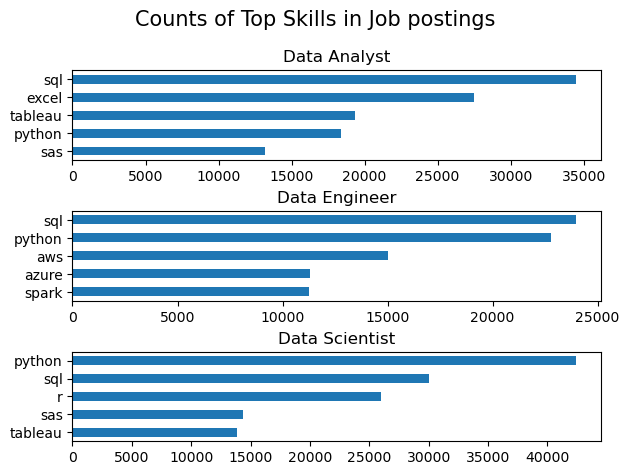

In [39]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    
fig.suptitle('Counts of Top Skills in Job postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [42]:
df_job_title_Count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [43]:
df_job_title_Count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [45]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_Count, how='left', on='job_title_short')

In [46]:
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,xamarin,Data Engineer,1,35080
1866,webex,Senior Data Scientist,1,12946
1867,webex,Software Engineer,1,1814
1868,planner,Cloud Engineer,1,423


In [47]:
df_skills_percent['skills_percent'] = 100 * df_skills_percent['skill_count']/df_skills_percent['jobs_total']

In [48]:
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skills_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,xamarin,Data Engineer,1,35080,0.002851
1866,webex,Senior Data Scientist,1,12946,0.007724
1867,webex,Software Engineer,1,1814,0.055127
1868,planner,Cloud Engineer,1,423,0.236407


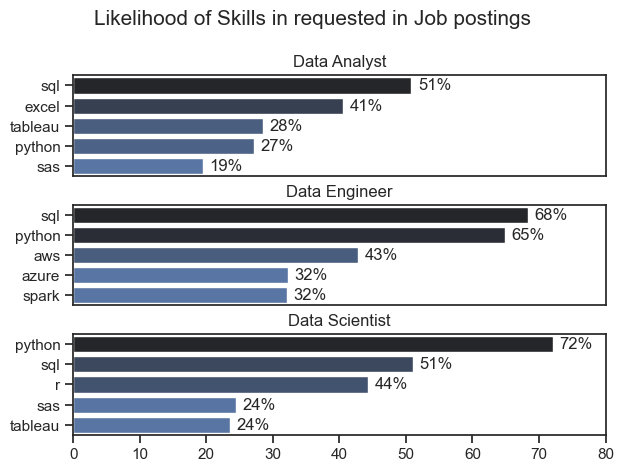

In [67]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skills_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skills_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,80)
    ax[i].legend().set_visible(False)
    
    for n, v in enumerate(df_plot['skills_percent']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')
    
    if i != len(job_titles) -1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills in requested in Job postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()